## 实验项目名称：决策树分类算法的肝病诊断

## 实验目的和要求：
* 掌握常见的数据读取方式
* 掌握pandas常用属性与方法
* 掌握DecisionTreeClassifier模型的构建及重要参数
* 掌握信息熵、信息增益、基尼系数的概念。
* 掌握分类模型评价的方法
* 掌握数据标准化的方法
* 掌握决策树的基本概念。



## 实验内容：
### 1.基于公开的肝病数据集，使用sklearn决策树算法构建对肝病分类预测模型
### 2.决策树可视化。

#### 数据来源
使用来自UCI的肝病数据集http://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset) 。该数据集包含了583个数据样本，其中有416个患肝病，167人未患肝病。每个数据样本共11个特征变量，其中一个特征变量表示是否患肝病，其中1表示患有肝病，2表示未患肝病。

## 实验步骤及结果    
#### 1.读入数据、探索数据

In [1]:
import pandas as pd
row=pd.read_csv("python_data\ILPD.csv",header=None)
row

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


从描述文件中得知数据共有11个特征及每个特征的含义，为了便于理解，将特征名翻译成中文之后给数据集添加上特征名称

In [2]:
row.columns=['年龄','性别','总胆红素','直接胆红素','Alkphos','血糖','血清','总Protiens','白蛋白','A/G比值','分类']

缺失值检查

In [3]:
row.isnull().sum()

年龄           0
性别           0
总胆红素         0
直接胆红素        0
Alkphos      0
血糖           0
血清           0
总Protiens    0
白蛋白          0
A/G比值        4
分类           0
dtype: int64

采用均值填补的方式，填补缺失值

In [4]:
row['A/G比值'].fillna(value=row['A/G比值'].mean(),inplace=True)

重复值检查

In [5]:
row.duplicated().sum()
row[row.duplicated()]
#row.drop_duplicates(inplace=True)
#row.reset_index()

,年龄,性别,总胆红素,直接胆红素,Alkphos,血糖,血清,总Protiens,白蛋白,A/G比值,分类
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


将性别列中的字符更改为数字表示，以符合模型处理数据的类型要求，Female转换为0，Male转换为1

In [6]:
list=[]
for i in row['性别']:
    if i=='Female':
        list.append(0)
    else: 
        list.append(1)
row.insert(loc=2,column='Gender',value=list)
row.drop('性别', axis=1, inplace=True)
row

,年龄,Gender,总胆红素,直接胆红素,Alkphos,血糖,血清,总Protiens,白蛋白,A/G比值,分类
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


统计患病和未患病人数

In [7]:
row['分类'].value_counts()

1    416
2    167
Name: 分类, dtype: int64

“年龄”特征的描述性统计情况

In [8]:
row['年龄'].describe()

count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: 年龄, dtype: float64

“总胆红素”和“直接胆红素”特征的描述性统计情况

In [9]:
row.iloc[:,2:4].describe()

,总胆红素,直接胆红素
count,583.000000,583.000000
mean,3.298799,1.486106
std,6.209522,2.808498
min,0.400000,0.100000
25%,0.800000,0.200000
50%,1.000000,0.300000
75%,2.600000,1.300000
max,75.000000,19.700000


#### 2.划分训练集和测试集

In [10]:
from sklearn.model_selection import train_test_split
data=row.iloc[:,0:10]
target=row.iloc[:,10]
xtrain,xtest,ytrain,ytest=train_test_split(data,target,random_state=30,test_size=0.2)

#### 3.选择信息增益划分属性建立决策树分类模型（可对重要参数max_depth、min_samples_leaf & min_samples_split等进行设置，优化模型分类效果）

In [11]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier(criterion="entropy"
                                ,random_state=30
                                ,splitter="random"
                                ,max_depth=3
                                ,min_samples_leaf=10
                                ,min_samples_split=10
                               )
clf2 = clf2.fit(xtrain,ytrain)

返回模型预测的准确度评分score

In [12]:
clf2.score(xtest,ytest)

0.7094017094017094

决策树可视化

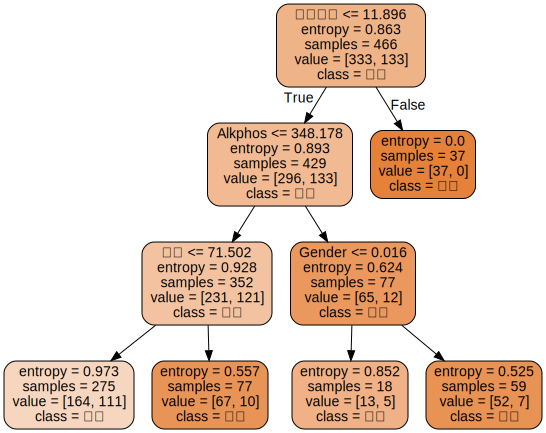

In [13]:
import graphviz
dot_data=tree.export_graphviz(clf2
                              ,feature_names=row.columns[0:10]
                              ,class_names=['患病','未患病']
                              ,filled=True
                              ,rounded=True
)
graph=graphviz.Source(dot_data)
graph

模型评估(混淆矩阵，分类评估报告)

In [14]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report

y_pred2 = clf2.predict(xtest)
metrics.accuracy_score(ytest,y_pred2)  #模型的准确率
cnf_matrix2 = metrics.confusion_matrix(ytest,y_pred2)
print(cnf_matrix2)
print(classification_report(ytest,y_pred2))

[[83  0]
 [34  0]]
              precision    recall  f1-score   support

           1       0.71      1.00      0.83        83
           2       0.00      0.00      0.00        34

    accuracy                           0.71       117
   macro avg       0.35      0.50      0.41       117
weighted avg       0.50      0.71      0.59       117



c:\Users\CqC33\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CqC33\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CqC33\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 4.选择基尼指数划分属性建立决策树分类模型

In [15]:
clf3 = tree.DecisionTreeClassifier(max_depth=3)
clf3 =clf3.fit(xtrain,ytrain)
dot_data=tree.export_graphviz(clf3
                              ,feature_names=row.columns[0:10]
                              ,class_names=['患病','未患病']
                              ,filled=True
                              ,rounded=True
)

返回模型预测的准确度评分score

In [16]:
clf3.score(xtest,ytest)

0.7008547008547008

决策树可视化

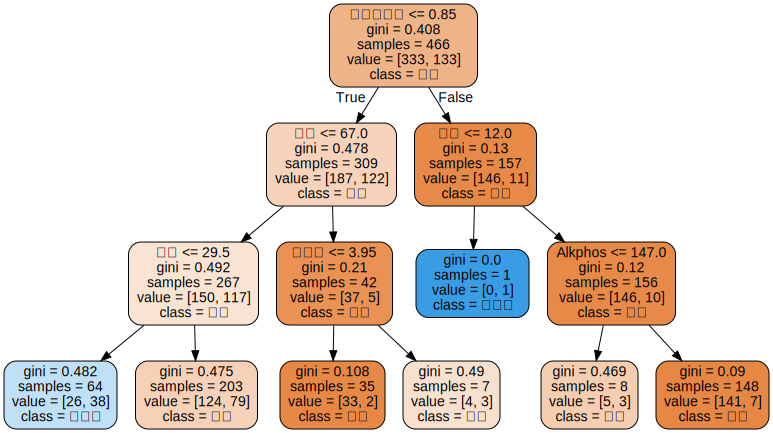

In [17]:
graph=graphviz.Source(dot_data)
graph

模型评估(混淆矩阵，分类评估报告)

In [18]:
y_pred3 = clf3.predict(xtest)
metrics.accuracy_score(ytest,y_pred3)  #模型的准确率
cnf_matrix3 = metrics.confusion_matrix(ytest,y_pred3)
print(cnf_matrix3)
print(classification_report(ytest,y_pred3))

[[76  7]
 [28  6]]
              precision    recall  f1-score   support

           1       0.73      0.92      0.81        83
           2       0.46      0.18      0.26        34

    accuracy                           0.70       117
   macro avg       0.60      0.55      0.53       117
weighted avg       0.65      0.70      0.65       117



## 实验结果

1. 采用信息增益划分属性生成的决策树模型评分是多少？在属性划分过程中最重要的特征是哪一个？

- 采用信息增益划分属性生成的决策树模型评分是0.7094017094017094
- 最重要的特征是总胆红素，由graphviz画出的决策树可以知道

2. 采用基尼系数划分属性生成的决策树模型评分是多少？在属性划分过程中最重要的特征是哪一个？

- 采用基尼系数划分属性生成的决策树模型评分是0.7008547008547008
- 最重要的特征是直接胆红素，由graphviz画出的决策树可以知道

## 实验所需软件环境和库
Jupyter Notebook、Python、Sklearn、Numpy、Pandas、graphviz

## 教师评语